<!--
Where are we?
-----

[Let's look at the map](http://insightdataengineering.com/blog/pipeline_map.html)
-->

The Cloud & AWS
===

<!--

![](images/living_in_the_cloud.jpg)

By the end of this session you will be able to:
----

- Explain what Cloud Computing is
- Provide reasons why Amazon leads in the cloud space 
- Provide pros and cons of cloud vs on-prem data systems
- Explain what AWS, S3, EC2 are
- Explain how cloud computing requires a different worldview

What is the cloud?
----

In the simplest terms, people running computers on your behalf that you can reach over the internet

What is software-as-a-service as part of the cloud (SaaS)?
> A company gives you an API over the internet, and then handle everything else for you.

<details><summary>
Q: What is a "no cloud" solution?
</summary>
The proverbial computer under your desk. 

You provide the internet connection and the electricity (and maintenance).
</details>

Why is The Cloud so popular?
---

Cloud vs On-Prem
----------------

What are the pros and cons of cloud vs on-premises hosting or *on-prem*?

Like Uber vs owning your own car.

Feature          |Cloud                    |On-Prem
-------          |-----                    |-------
Cost             |Higher variable cost     |Higher fixed cost
Capacity         |Elastic                  |Fixed
Performance      |Moderate                 |Can be better if within
Security         |Provider secures         |Company secures
Office Politics  |Teams get own resources  |Teams compete for fixed resources
Time to Setup    | Fast!   | Slow!

---


![](images/evolution_of_the_cloud.jpg)

Who are the major cloud providers?
----

![](images/covering_your_.jpg)


---
Steve Yegge and Decoupled Design
--------------------------------

<img src="images/yegge.jpg">

Who is Steve Yegge?

- Steve Yegge is a developer from Amazon and Google.

- Steve blogged a long [rant][yegge-rant] about Amazon's APIs vs
  Google's APIs.

[yegge-rant]: https://plus.google.com/+RipRowan/posts/eVeouesvaVX

What is the difference between Amazon and Google's APIs?

- At Amazon developers have to use Amazon's public APIs to for their
  internal dependencies.
- At Google developers can use private APIs for dependencies.
- The forced dogfooding makes Amazon's APIs more decoupled.


---
Why AWS?
---

![](http://www.datacenterknowledge.com/wp-content/uploads/2015/05/Screen-Shot-2015-05-28-at-10.23.03-AM-e1432833116144.png
   )
[Source](http://www.datacenterknowledge.com/archives/2015/05/28/gartner-aws-pulls-further-ahead-in-iaas-cloud-market/)

----
[Explore console page](https://us-west-2.console.aws.amazon.com/console/home?region=us-west-2#)

----
What are the primary services that Amazon AWS offers?
-----

| Name   | Full Name | Should have been called | Service | Use this to |
|:-------:|:------:|:------:|:------:|
| S3     | Simple Storage Service     | Unlimited FTP Server  | Storage | Store images and other assets for websites. Keep backups and share files between services. Host static websites. Also, many of the other AWS services write and read from S3. |
| EC2    | Elastic Compute Cloud      | Virtual Servers | Execution | Host the bits of things you think of as a computer  |


----
What is AWS S3?
----

![](images/s3.png)

Amazon S3 is a simple key, value store designed to store as many objects as you want. 

You store these objects in one or more buckets. 

__This is your 1st NoSQL datastore!__

-->

---
What is AWS's EC2?
---

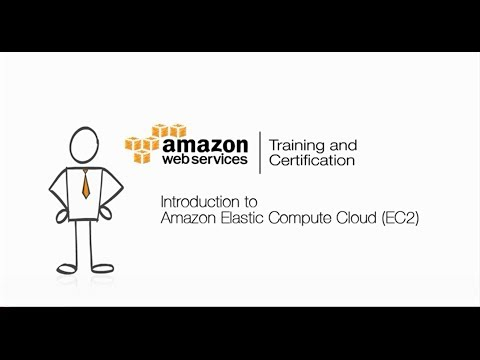

In [31]:
from IPython.display import YouTubeVideo
YouTubeVideo("Px7ZPLq4AOU")

But about GPUs?

AWS has them - [HPC](https://aws.amazon.com/hpc/)

Connecting to EC2
-----------------

Q: How can I connect to an EC2 instance?

- Login to the AWS console.

- Navigate: EC2 > Launch Instance > Community AMIs > Search community AMIs > `ami-d1737bb8`

- View the instance and get its Public DNS.

- This should look something like `ec2-52-3-161-43.compute-1.amazonaws.com`.

- Use this command to connect to it.

- `ssh -X -i ~/.ssh/keypair.pem user@domain`

- Here is an example. 

- `ssh -X -i ~/.ssh/keypair.pem ubuntu@ec2-52-3-161-43.compute-1.amazonaws.com`

- Make sure you replace the Public DNS value below with the value you
  have for your instance.

Copying Files to EC2
--------------------

Q: How can I copy files to the EC2 instance?

- To copy a file `myfile.txt` to EC2, use a command like this.

- `scp -i ~/.ssh/keypair.pem myfile.txt user@domain:`

- To copy a directory `mydir` recursively to EC2, use a command like
  this. 
  
- `scp -i ~/.ssh/keypair.pem -r mydir user@domain:`

Regions
-------

Q: What are *AWS Regions*?

- AWS is hosted in different geographic locations world-wide. 

- For example, there are 3 regions in the US.

Q: What are the regions in the US

Region       |Name       |Location 
------       |----       |-------- 
us-east-1    |US East    |N. Virginia
us-east-2    |US East 2  |Ohio
us-west-1    |US West    |N. California
us-west-2    |US West 2  |Oregon

Q: How should I choose a region?

- N. Virginia or `us-east-1` is the default region for EC2.

- Using a region other than N. Virginia requires additional configuration.

- If you are not sure choose N. Virginia.

Availability Zones
------------------

Q: What are *AWS Availability Zones*?

- Regions are divided into isolated availability zones for fault
  tolerance.

- Availability zone run on physically separate hardware and
  infrastructure.

- They do not share hardware, or generators, or cooling equipment. 

- Availability zones are assigned automatically to your EC2 instances
  based on your user ID.

<img src="images/aws_regions.png">

<details><summary>
Q: Is it possible for two separate users to coordinate and land on the
same availability zone?
</summary>
1. Availability zones are assigned automatically by the system.
<br>
2. It is not possible for two AWS users to coordinate and be hosted on the same
availability zone.
</details>



---
What is EBS?
---

Name   |Full Name                  |Service
----   |---------                  |-------
EBS    |Elastic Block Store        |Storage attached to EC2 instances


S3 vs EBS
---------

What is the difference between S3 and EBS? Why would I use one versus
the other?

Feature                |S3                   |EBS
-------                |--                   |---
Can be accessed from   |Anywhere on the web  |Particular availability zone
Can be accessed from   |Any EC2 instance     |EC2 instance attached to it
Pricing                |Storage              |Storage + IOPS
Price                  |Cheaper              |More Expensive
Latency                |Higher               |Lower
Throughput             |Varies More          |Varies Less
Performance            |Slightly Worse       |Slightly Better
Max volume size        |Unlimited            |16 TB
Max file size          |5 TB                 |16 TB


Check for understanding
--------

<details><summary>
Q: I want to store some video files on the web. Which Amazon service
should I use?
</summary>
S3
</details>

<details><summary>
Q: I just created an iPhone app which needs to store user profiles on the
web somewhere. Which Amazon service should I use?
</summary>
S3
</details>

<details><summary>
Q: I want to create a web application in PHP. Which Amazon service
should I use?
</summary>
EC2 + EBS or EC2 + S3
</details>


---
Servers: Cattle, not cats
---

![](images/servers_pets_or_cattle.jpg)

---

![](images/cloudscaling_pets_cattle_servers.jpg)

Don't become attached to specific instances in the cloud

---
Setup up monitoring for billing
----

http://docs.aws.amazon.com/awsaccountbilling/latest/aboutv2/tracking-free-tier-usage.html

----
Shut down clusters everyday
---

Summary:
-----

- The Cloud is people running computers and services on your behalf. You lease (not own). Allows for quick trying and scaling
- Can get $$$
- AWS is the dominant cloud provider
- The main services are
    - S3 - object storage
    - EC2 - compute
- There are many other services, including machine learning

![](images/dilbert_cloud.jpg)

<br>

----